
#**INTRODUCTION**

Using machine learning for disease detection and classification has become essential in medical research, offering quicker and more precise diagnoses. This report examines the application of Random Forest and HistGradient Boosting algorithms for disease classification tasks. As ensemble learning methods, these algorithms are particularly adept at managing intricate data patterns, making them highly effective for medical scenarios where accurate predictions are critical.

In [ ]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

In [ ]:
# Read in our Training dataset
heartTrain_df = pd.read_csv('DiseaseTraining.csv')
heartTrain_df.shape

(4920, 134)

In [ ]:
heartTrain_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
# Read in our Testing dataset
heartTest_df = pd.read_csv('DiseaseTesting.csv')
heartTest_df.shape

(42, 133)

In [ ]:
heartTest_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
# Print columns
for c in heartTest_df.columns:
    print(c)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [ ]:
# Remove unwanted Column
heartTrain_df.drop(columns = 'Unnamed: 133',axis=1,inplace=True)

In [ ]:
# Display all unique values in the 'prognosis' column of the heartTrain_df DataFrame
heartTrain_df['prognosis'].unique()


array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
# display all column names
heartTrain_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
# Display detailed information about the heartTrain_df DataFrame, including column names, non-null counts, and data types.
heartTrain_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 133 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    itching                         int64 
 1    skin_rash                       int64 
 2    nodal_skin_eruptions            int64 
 3    continuous_sneezing             int64 
 4    shivering                       int64 
 5    chills                          int64 
 6    joint_pain                      int64 
 7    stomach_pain                    int64 
 8    acidity                         int64 
 9    ulcers_on_tongue                int64 
 10   muscle_wasting                  int64 
 11   vomiting                        int64 
 12   burning_micturition             int64 
 13   spotting_ urination             int64 
 14   fatigue                         int64 
 15   weight_gain                     int64 
 16   anxiety                         int64 
 17   cold_hands_and_feets           

#**Label Encoding**

### *We* use label encoding to convert the categorical text values in the prognosis column into unique integer codes. Each unique diagnosis or outcome in prognosis is mapped to a specific numeric value, enabling the machine learning model to process it effectively, as models typically require numerical inputs rather than text.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Fit LabelEncoder on the 'prognosis' column in the training set and testing set
le.fit(heartTrain_df['prognosis'])
le.fit(heartTest_df['prognosis'])

LabelEncoder()

In [ ]:
# Encode 'prognosis' column in both train and test datasets
heartTrain_df['prognosis'] = le.transform(heartTrain_df['prognosis'])
heartTest_df['prognosis'] = le.transform(heartTest_df['prognosis'])

In [ ]:
heartTrain_df.head(25)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


# **Models**


1. Random Forest
2. Histgradient Boosting Classifier

##**RANDOM FOREST**

Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting. It works by training several trees on random subsets of the data and aggregating their predictions, leading to better generalization and robustness in classification tasks.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc = rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.9761904761904762

In [ ]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.62%


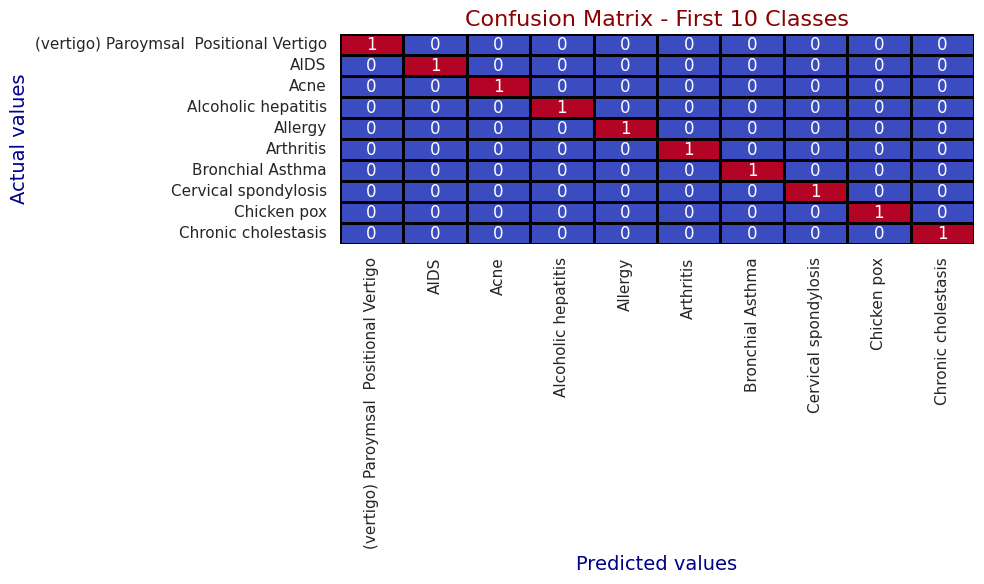

In [ ]:
sns.set(style="whitegrid", palette="dark:#5A9_r")  # Dark color palette with gridlines

# Create a sample plot
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_subset_2, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=class_names, yticklabels=class_names, linewidths=1, linecolor='black')

# Customize plot titles and labels
plt.xlabel("Predicted values", fontsize=14, color='darkblue')
plt.ylabel("Actual values", fontsize=14, color='darkblue')
plt.title("Confusion Matrix - First 10 Classes", fontsize=16, color='darkred')

# Show the plot
plt.tight_layout()
plt.show()

#Histgradient Boosting Classifier

Algorithm uses histogram-based techniques to efficiently handle large datasets with high-dimensional features. It is particularly effective for classification tasks, offering high performance and fast training times, especially with large-scale data.

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

X_train = heartTrain_df.copy().drop(columns=['prognosis'])
y_train = heartTrain_df.copy()['prognosis']
X_test = heartTest_df.copy().drop(columns=['prognosis'])
y_test = heartTest_df.copy()['prognosis']


clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)



0.9761904761904762

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.62%


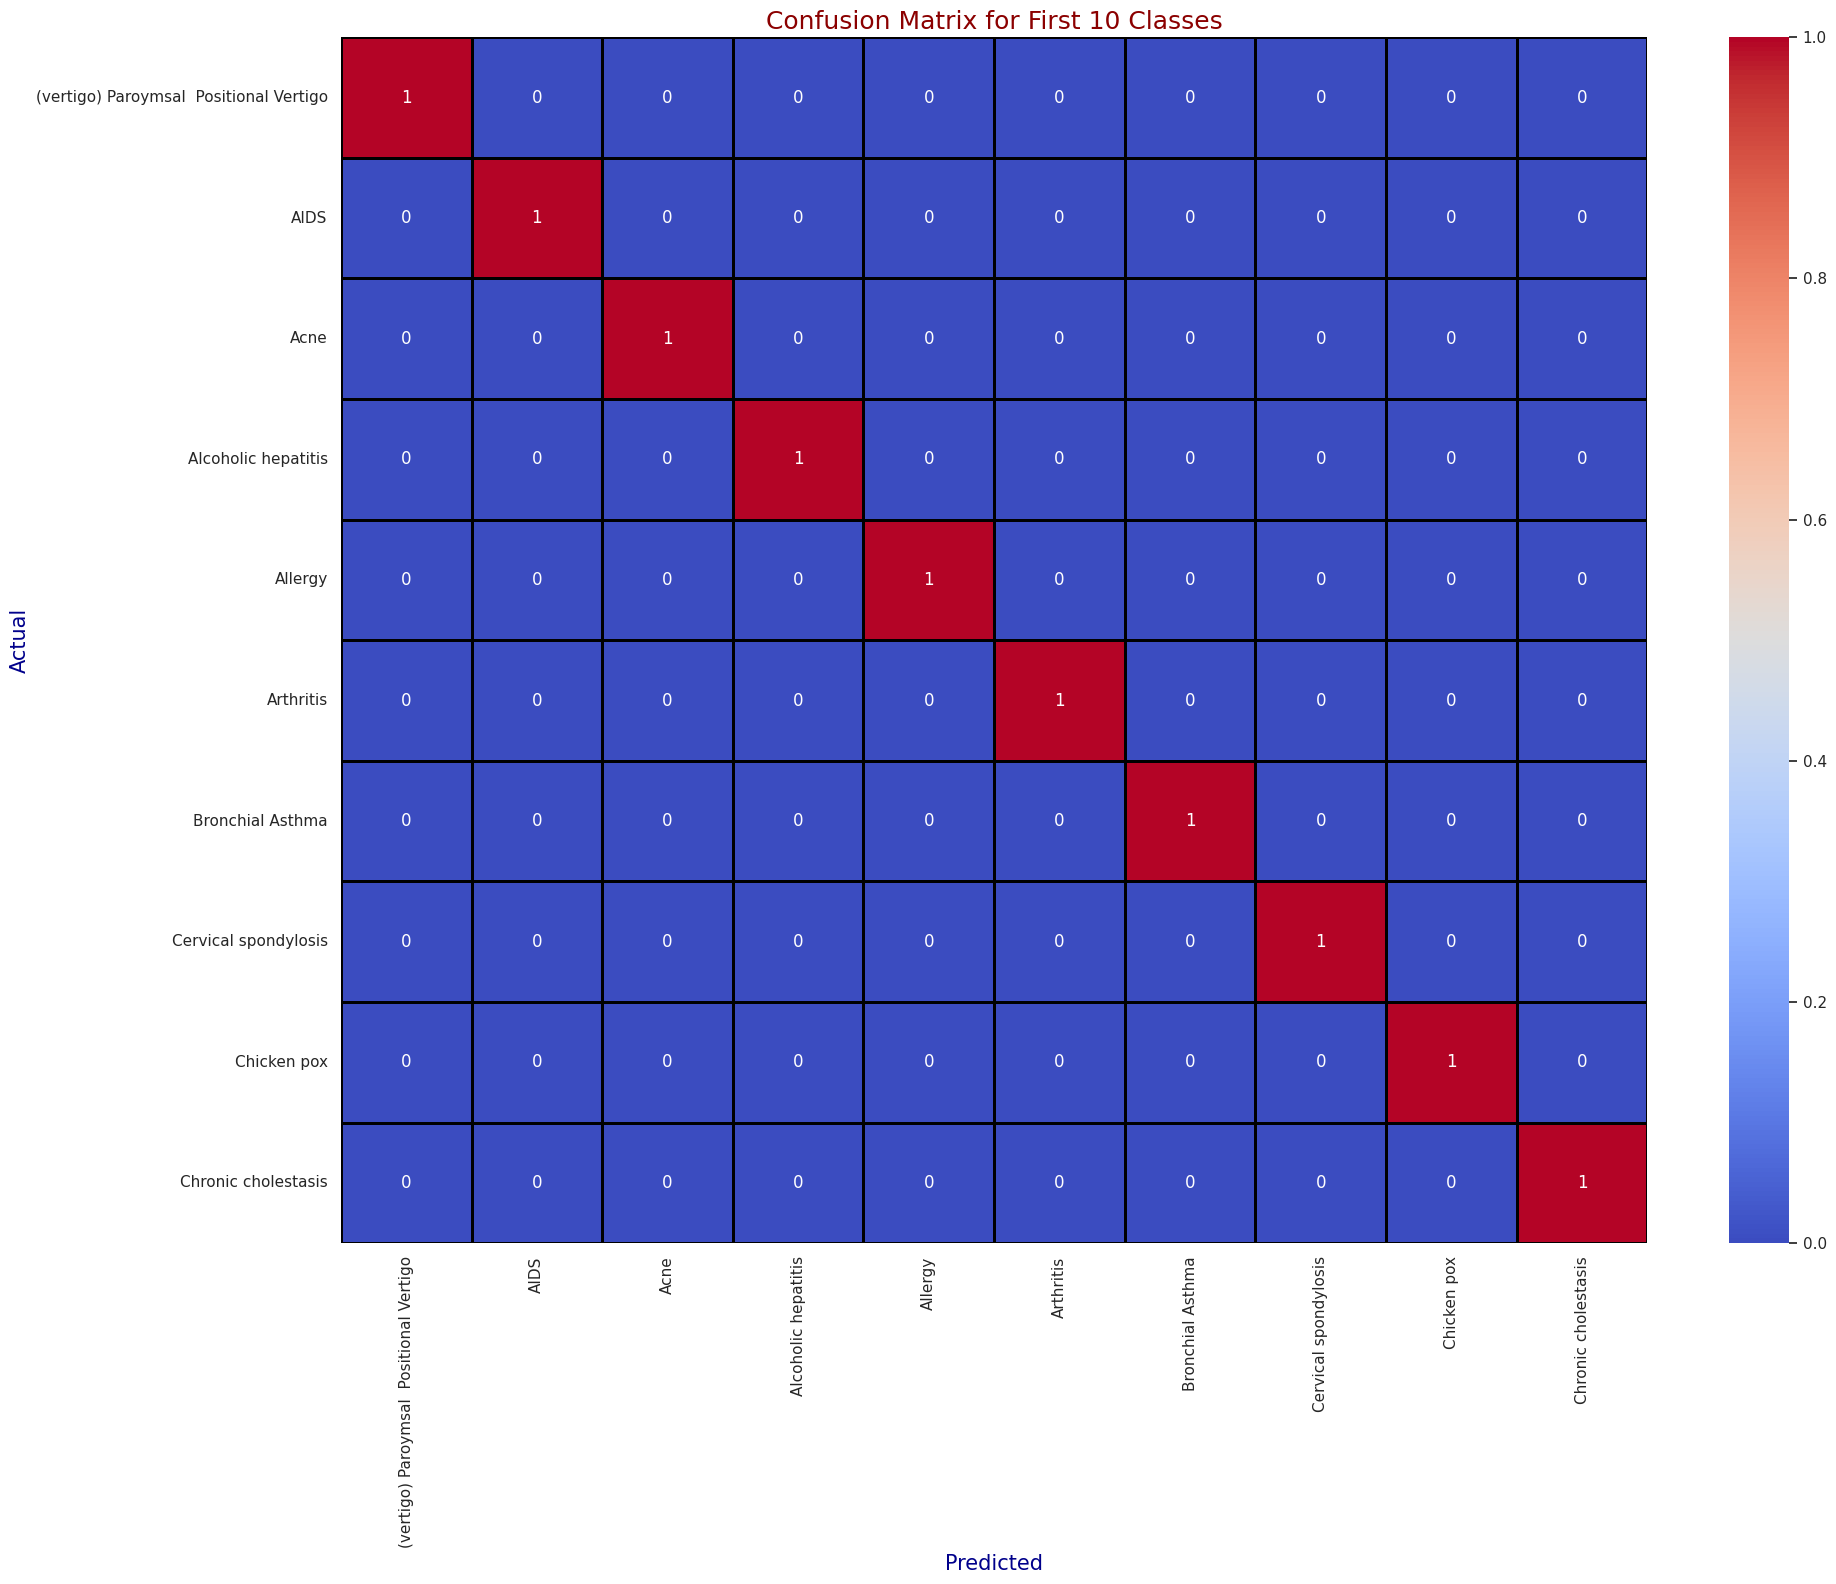

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Take only the first 10 classes from the confusion matrix
conf_matrix_subset = conf_matrix[:10, :10]

# Decode class labels (0 to 9)
decoded_class_names = le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
class_names = decoded_class_names[:10]

# Set the style for the plot
sns.set(style="whitegrid", palette="muted")  # Background with grid and muted palette

# Create the figure and axis for the plot
plt.figure(figsize=(20, 16))

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix_subset, annot=True, fmt="d", cmap="coolwarm", cbar=True,  # Change color palette to "coolwarm"
            xticklabels=class_names, yticklabels=class_names, linewidths=1, linecolor='black')

# Customize labels and title
plt.xlabel("Predicted", fontsize=15, color='darkblue')
plt.ylabel("Actual", fontsize=15, color='darkblue')
plt.title("Confusion Matrix for First 10 Classes", fontsize=18, color='darkred')

# Adjust layout for a clean look
plt.tight_layout()

# Display the plot
plt.show()

##**CONCLUSION**


In this analysis, the Random Forest and HistGradient Boosting Classifier models perform excellently in classifying disease types based on the given symptom data. Both models achieve an accuracy of over 97%, which suggests their suitability for medical diagnosis tasks. The confusion matrix visualization further helps in understanding the model's prediction behavior for different disease classes.